# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


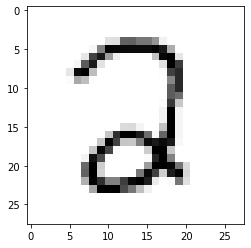

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24239691172410127
train accuracy is: 0.5894675346352862, test accuracy is 0.5992943548387096


Epoch 10 Loss 0.12235610771964199
train accuracy is: 0.9112835920547487, test accuracy is 0.9254032258064516


Epoch 20 Loss 0.06589978409210785
train accuracy is: 0.9359873143047905, test accuracy is 0.9450604838709677


Epoch 30 Loss 0.0489894445350302
train accuracy is: 0.9479218828242364, test accuracy is 0.9566532258064516


Epoch 40 Loss 0.04144335893038852
train accuracy is: 0.9543481889500918, test accuracy is 0.9606854838709677


Epoch 50 Loss 0.03714735836307779
train accuracy is: 0.957269237189117, test accuracy is 0.9642137096774194


Epoch 60 Loss 0.03432249243574171
train accuracy is: 0.9600233683859122, test accuracy is 0.9647177419354839


Epoch 70 Loss 0.032279386784715945
train accuracy is: 0.9618594558504423, test accuracy is 0.9652217741935484


Epoch 80 Loss 0.030705225485330404
train accuracy is: 0.9631947921882824, test accuracy is 0.9662298387096774


Epoch 90 Loss 0.029442913611815835
train accuracy is: 0.9655316307795025, test accuracy is 0.9667338709677419


Epoch 100 Loss 0.02839242206669324
train accuracy is: 0.9665331330328827, test accuracy is 0.96875


Epoch 110 Loss 0.027502209206545836
train accuracy is: 0.9668669671173427, test accuracy is 0.96875


Epoch 120 Loss 0.02673063304073505
train accuracy is: 0.9678684693707228, test accuracy is 0.969758064516129


Epoch 130 Loss 0.026051871674875108
train accuracy is: 0.9683692204974128, test accuracy is 0.9702620967741935


Epoch 140 Loss 0.025435721081298643
train accuracy is: 0.9696210983141379, test accuracy is 0.9692540322580645


Epoch 150 Loss 0.024880478624701278
train accuracy is: 0.9702053079619429, test accuracy is 0.9692540322580645


Epoch 160 Loss 0.024363933576678924
train accuracy is: 0.971206810215323, test accuracy is 0.969758064516129


Epoch 170 Loss 0.023895268517324254
train accuracy is: 0.972041395426473, test accuracy is 0.9692540322580645


Epoch 180 Loss 0.02344697300818101
train accuracy is: 0.9729594391587381, test accuracy is 0.96875


Epoch 190 Loss 0.023028571266330594
train accuracy is: 0.9731263562009681, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.022633134927987276
train accuracy is: 0.9741278584543482, test accuracy is 0.9692540322580645


Epoch 210 Loss 0.02226687430556446
train accuracy is: 0.9741278584543482, test accuracy is 0.9682459677419355


Epoch 220 Loss 0.02192418422479232
train accuracy is: 0.9745451510599232, test accuracy is 0.96875


Epoch 230 Loss 0.021584871382905445
train accuracy is: 0.9751293607077283, test accuracy is 0.96875


Epoch 240 Loss 0.021270769622308082
train accuracy is: 0.9753797362710733, test accuracy is 0.9692540322580645


0.04148497424750633

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23312835750385583
train accuracy is: 0.7179101986312802, test accuracy is 0.7182459677419355


Epoch 10 Loss 0.10320201616849069
train accuracy is: 0.9074445000834586, test accuracy is 0.9193548387096774


Epoch 20 Loss 0.07887448499300295
train accuracy is: 0.9298948422633951, test accuracy is 0.9430443548387096


Epoch 30 Loss 0.06779137463558788
train accuracy is: 0.9366549824737106, test accuracy is 0.9490927419354839


Epoch 40 Loss 0.06118976925790892
train accuracy is: 0.9419128693039559, test accuracy is 0.9506048387096774


Epoch 50 Loss 0.0567044207082731
train accuracy is: 0.9451677516274412, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.05341522981949482
train accuracy is: 0.9477549657820064, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.050873417647369516
train accuracy is: 0.9492572191620764, test accuracy is 0.9591733870967742


Epoch 80 Loss 0.04883426661293202
train accuracy is: 0.9507594725421465, test accuracy is 0.9616935483870968


Epoch 90 Loss 0.047154377764122644
train accuracy is: 0.9525955600066767, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.04573873763911077
train accuracy is: 0.9543481889500918, test accuracy is 0.9642137096774194


Epoch 110 Loss 0.04452461839721006
train accuracy is: 0.9555166082457018, test accuracy is 0.9637096774193549


Epoch 120 Loss 0.04346912231633406
train accuracy is: 0.956434651977967, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04253934884149818
train accuracy is: 0.957519612752462, test accuracy is 0.9647177419354839


Epoch 140 Loss 0.04171397864617677
train accuracy is: 0.9582707394424971, test accuracy is 0.9647177419354839


Epoch 150 Loss 0.040974200473487855
train accuracy is: 0.9589384076114171, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.04030515410670914
train accuracy is: 0.9591887831747622, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.03969727494581646
train accuracy is: 0.9596895343014522, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.039141871718725726
train accuracy is: 0.9604406609914873, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.03862975026357916
train accuracy is: 0.9607744950759473, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.03815842733073872
train accuracy is: 0.9609414121181773, test accuracy is 0.967741935483871


Epoch 210 Loss 0.0377202416108357
train accuracy is: 0.9613587047237523, test accuracy is 0.96875


Epoch 220 Loss 0.03731348073679943
train accuracy is: 0.9616925388082124, test accuracy is 0.9692540322580645


Epoch 230 Loss 0.036932892927285924
train accuracy is: 0.9616090802870974, test accuracy is 0.969758064516129


Epoch 240 Loss 0.03657746416909533
train accuracy is: 0.9618594558504423, test accuracy is 0.969758064516129


0.01230316619265701

### Comparing results of NN and LR

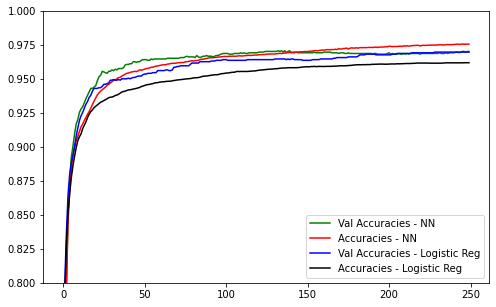

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

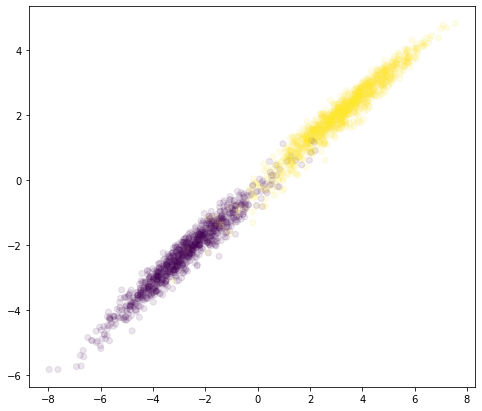

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

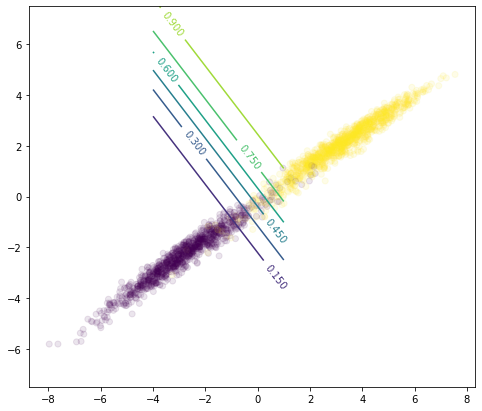

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );